# Question 3: Outlier Detection (10 points)
Chenran Ning (cn257)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# read data
df = pd.read_csv("prog_book.csv", thousands=',')
display(df)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706
...,...,...,...,...,...,...,...
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294


## Task 1: Univariate Outlier detection (4 points)

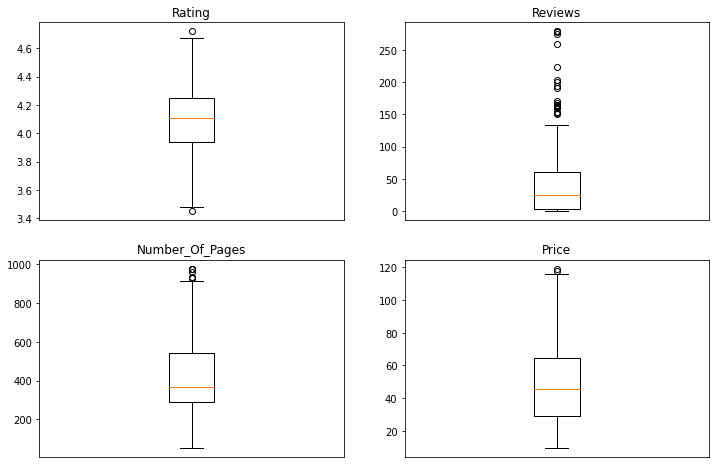

In [22]:
detection_rows = ["Rating", "Reviews", "Number_Of_Pages", "Price"]
def outlier_detection(df, name):
    data = df[[name]].to_numpy()
    # finding the 1st quartile
    q1 = np.quantile(data, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    # finding the iqr region
    iqr = q3 - q1
    # finding upper and lower whiskers
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
#     print(iqr, upper_bound, lower_bound)
    # boxplot of data within the whisker
    data = data[(data >= lower_bound) & (data <= upper_bound)]
    plt.boxplot(data)
    plt.xticks([])
    plt.title(name)
    
plt.figure(figsize = (12,8))
i = 1
for name in detection_rows:
    plt.subplot(2,2,i)
    i += 1
    outlier_detection(df, name)
# plt.show()


## Task 2: Multivariate Outlier detection (6 points)

### bivariate analysis on all possible pairs of the above features and identify any outliers
features = ["Rating", "Reviews", "Number_Of_Pages", "Price", "Type_category"]

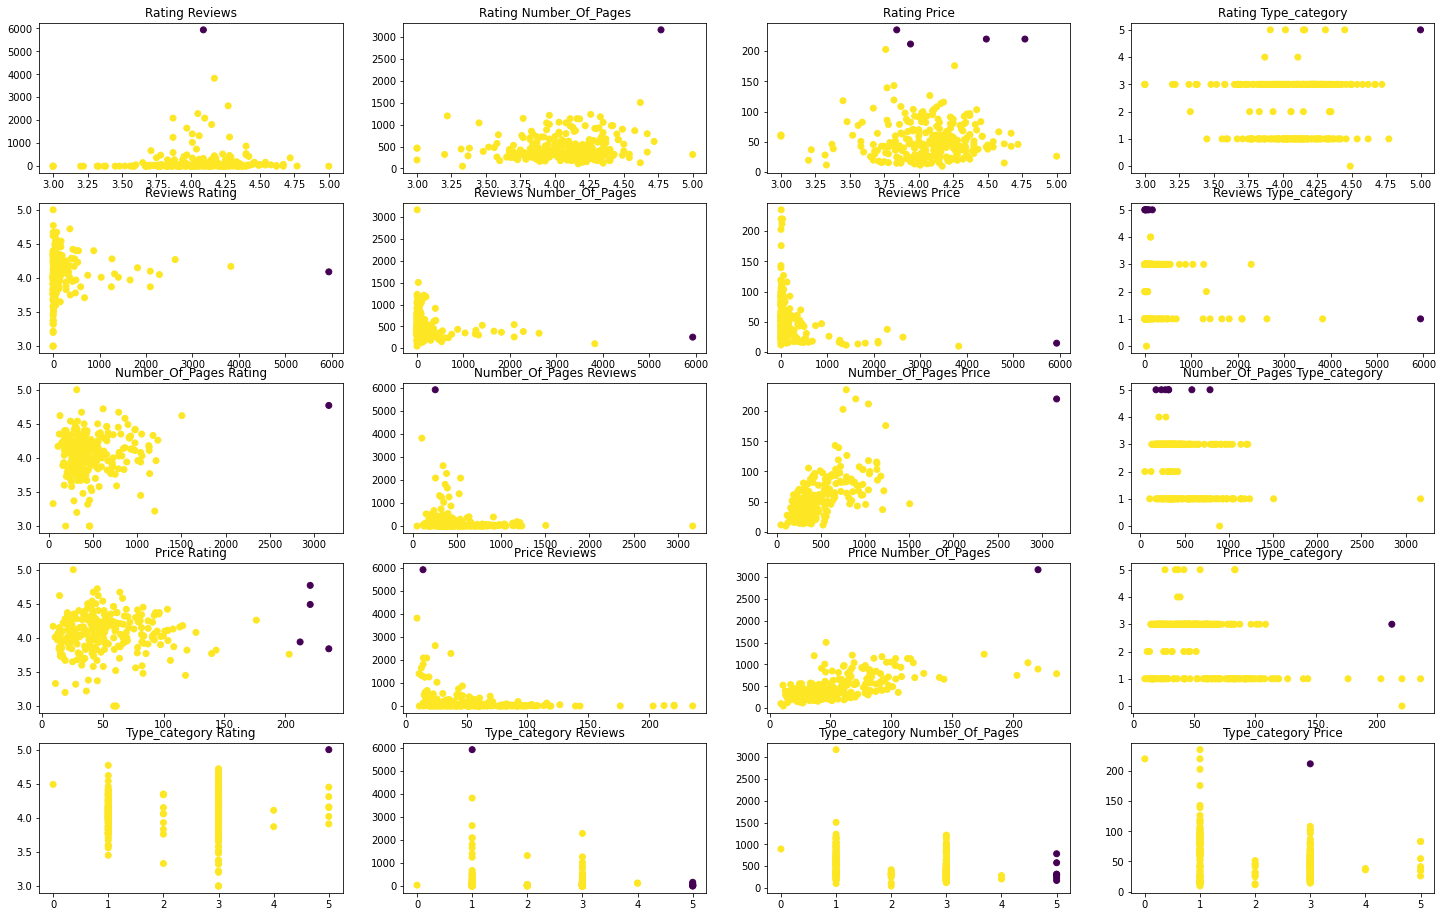

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, RobustScaler

df["Type_category"] = df["Type"].astype('category').cat.codes
features = ["Rating", "Reviews", "Number_Of_Pages", "Price", "Type_category"]
i = 1
j = 0
plt.figure(figsize=(25,16))

outliers = {}

for feature1 in features:
    for feature2 in features:
        if feature1 == feature2:
            continue
        plt.subplot(5,4,i)
        i += 1
        combined_feature = df[[feature1, feature2]].to_numpy()
        scaled_features = combined_feature.copy()
        # scale to 0,1
        scaler1 = MinMaxScaler()
        scaler1.fit(scaled_features[:,0].reshape(-1, 1))
        scaled_features[:,0] = scaler1.transform(scaled_features[:,0].reshape(-1, 1)).reshape(-1)
        
        scaler2 = MinMaxScaler()
        scaler2.fit(scaled_features[:,1].reshape(-1, 1))
        scaled_features[:,1] = scaler2.transform(scaled_features[:,1].reshape(-1, 1)).reshape(-1)
        
        clustering = DBSCAN(eps=0.3, min_samples=10).fit(scaled_features)
        labels = clustering.labels_
        
        title = feature1 + " " + feature2
        indexs = np.array(np.where(labels < 0)).reshape(-1)
        out = np.array(combined_feature[indexs])
        out = pd.DataFrame(data = out, index = indexs, columns = [feature1, feature2])
        outliers[title] = out
        
        plt.title(title)
        plt.scatter(combined_feature[:,0], combined_feature[:,1], c = labels)
        
plt.show()


In [119]:
# print the index and value of outliers

print("Outlier indexs and values")
for title, outlier in outliers.items():
    print(title + " : ")
    display(outlier)

Outlier indexs and values
Rating Reviews : 


,Rating,Reviews
6,4.09,5938.0


Rating Number_Of_Pages : 


,Rating,Number_Of_Pages
269,4.77,3168.0


Rating Price : 


,Rating,Price
267,3.94,212.097059
268,4.49,220.385294
269,4.77,220.385294
270,3.84,235.650000


Rating Type_category : 


,Rating,Type_category
54,5.0,5.0


Reviews Rating : 


,Reviews,Rating
6,5938.0,4.09


Reviews Number_Of_Pages : 


,Reviews,Number_Of_Pages
6,5938,256


Reviews Price : 


,Reviews,Price
6,5938.0,14.232353


Reviews Type_category : 


,Reviews,Type_category
6,5938,1
54,0,5
78,33,5
88,161,5
107,18,5
166,57,5
228,88,5
229,3,5


Number_Of_Pages Rating : 


,Number_Of_Pages,Rating
269,3168.0,4.77


Number_Of_Pages Reviews : 


,Number_Of_Pages,Reviews
6,256,5938


Number_Of_Pages Price : 


,Number_Of_Pages,Price
269,3168.0,220.385294


Number_Of_Pages Type_category : 


,Number_Of_Pages,Type_category
54,317,5
78,237,5
88,176,5
107,320,5
166,283,5
228,787,5
229,582,5


Price Rating : 


,Price,Rating
267,212.097059,3.94
268,220.385294,4.49
269,220.385294,4.77
270,235.650000,3.84


Price Reviews : 


,Price,Reviews
6,14.232353,5938.0


Price Number_Of_Pages : 


,Price,Number_Of_Pages
269,220.385294,3168.0


Price Type_category : 


,Price,Type_category
267,212.097059,3.0


Type_category Rating : 


,Type_category,Rating
54,5.0,5.0


Type_category Reviews : 


,Type_category,Reviews
6,1,5938
54,5,0
78,5,33
88,5,161
107,5,18
166,5,57
228,5,88
229,5,3


Type_category Number_Of_Pages : 


,Type_category,Number_Of_Pages
54,5,317
78,5,237
88,5,176
107,5,320
166,5,283
228,5,787
229,5,582


Type_category Price : 


,Type_category,Price
267,3.0,212.097059


### all combinations of three variables

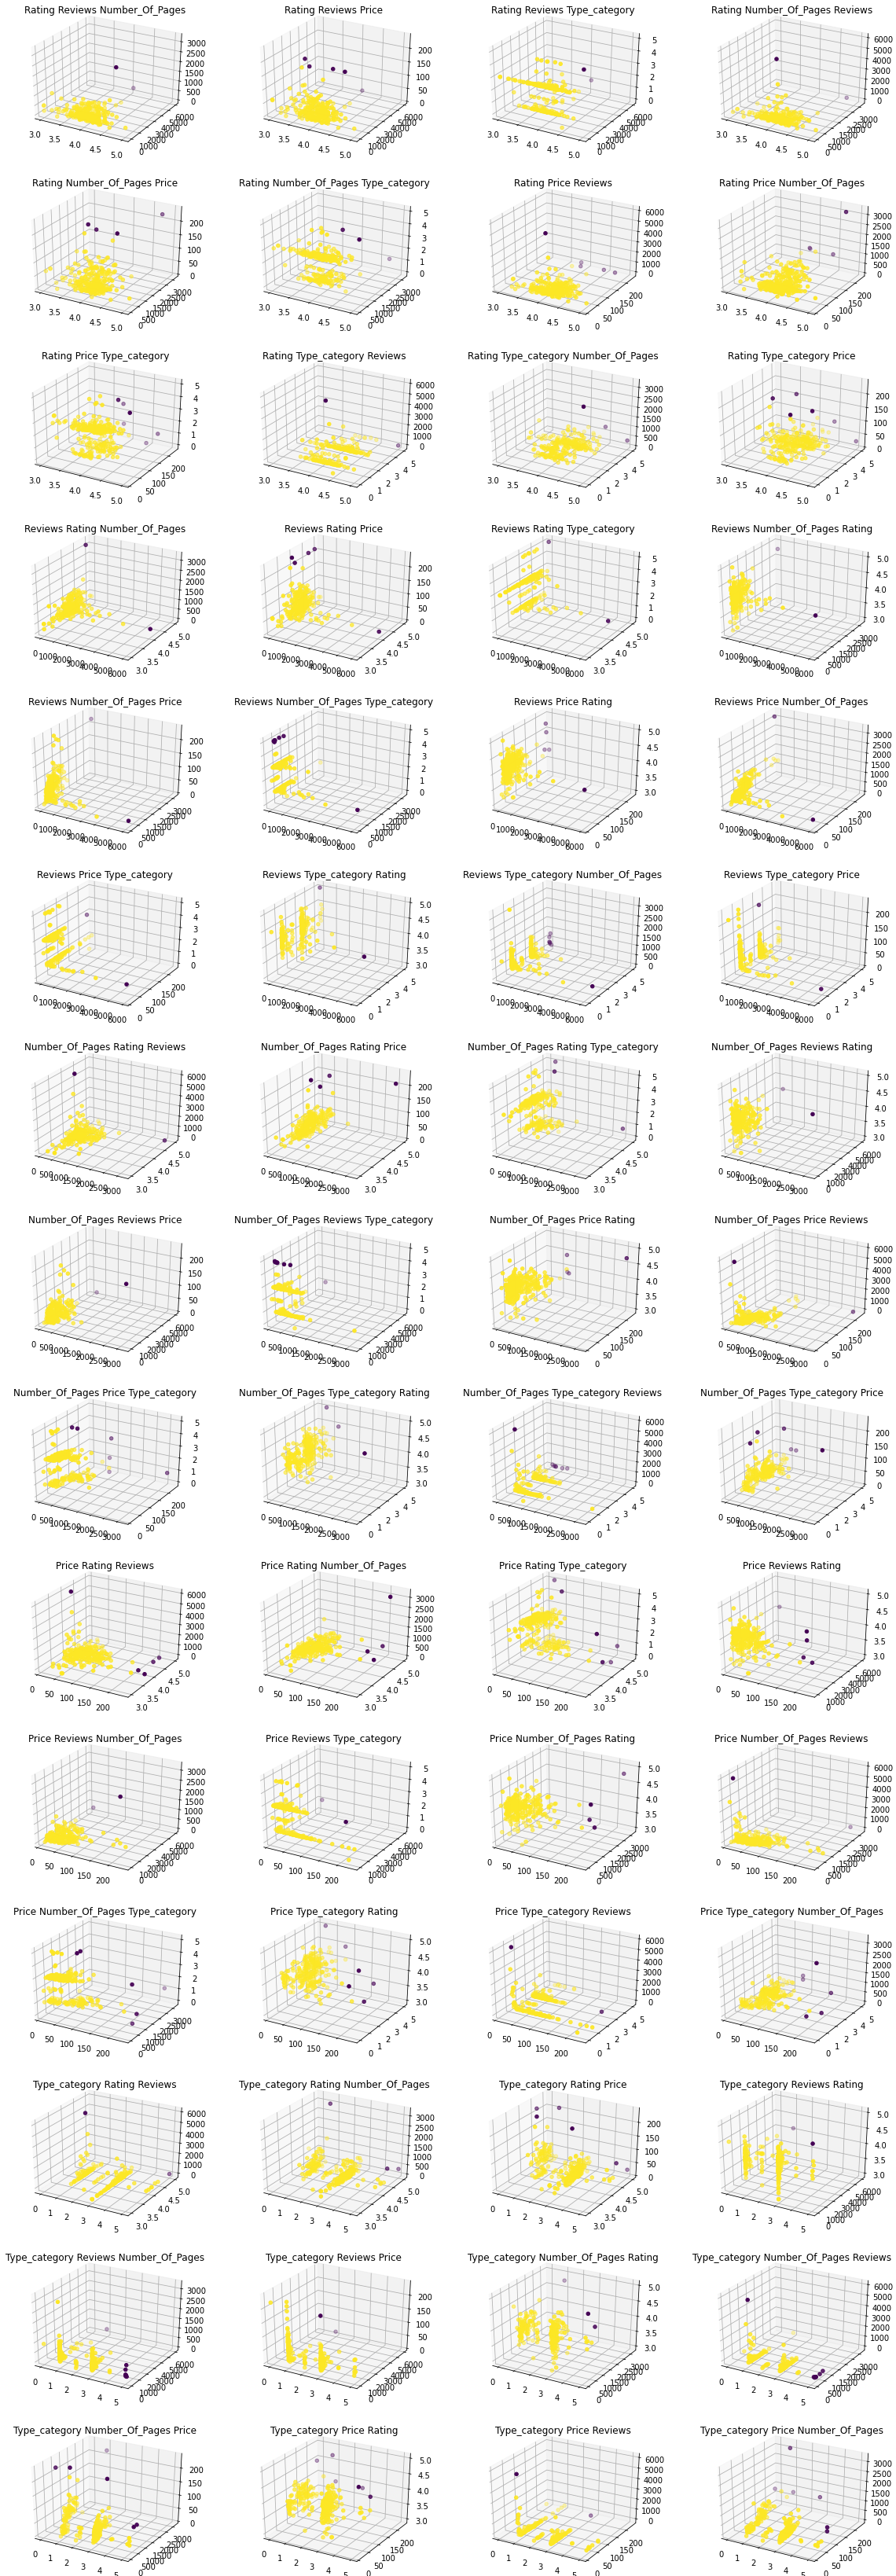

In [128]:

df["Type_category"] = df["Type"].astype('category').cat.codes
features = ["Rating", "Reviews", "Number_Of_Pages", "Price", "Type_category"]
i = 1
j = 0
fig = plt.figure(figsize=(20,60))

outliers = {}

for feature1 in features:
    for feature2 in features:
        if feature1 == feature2:
            continue
        for feature3 in features:
            if feature2 == feature3 or feature3 == feature1:
                continue
            ax = fig.add_subplot(15, 4, i, projection='3d')
            i += 1
            combined_feature = df[[feature1, feature2, feature3]].to_numpy()
            scaled_features = combined_feature.copy()
            # scale to 0,1
            scaler1 = MinMaxScaler()
            scaler1.fit(scaled_features[:,0].reshape(-1, 1))
            scaled_features[:,0] = scaler1.transform(scaled_features[:,0].reshape(-1, 1)).reshape(-1)

            scaler2 = MinMaxScaler()
            scaler2.fit(scaled_features[:,1].reshape(-1, 1))
            scaled_features[:,1] = scaler2.transform(scaled_features[:,1].reshape(-1, 1)).reshape(-1)
            
            scaler3 = MinMaxScaler()
            scaler3.fit(scaled_features[:,2].reshape(-1, 1))
            scaled_features[:,2] = scaler3.transform(scaled_features[:,2].reshape(-1, 1)).reshape(-1)

            clustering = DBSCAN(eps=0.3, min_samples=10).fit(scaled_features)
            labels = clustering.labels_

            title = feature1 + " " + feature2 + " " + feature3
            indexs = np.array(np.where(labels < 0)).reshape(-1)
            out = np.array(combined_feature[indexs])
            out = pd.DataFrame(data = out, index = indexs, columns = [feature1, feature2, feature3])
            outliers[title] = out

            ax.set_title(title)
            ax.scatter3D(combined_feature[:,0], combined_feature[:,1], combined_feature[:,2], c = labels)
        
plt.show()

In [129]:
print("Outlier indexs and values")
for title, outlier in outliers.items():
    print(title + " : ")
    display(outlier)

Outlier indexs and values
Rating Reviews Number_Of_Pages : 


,Rating,Reviews,Number_Of_Pages
6,4.09,5938.0,256.0
269,4.77,4.0,3168.0


Rating Reviews Price : 


,Rating,Reviews,Price
6,4.09,5938.0,14.232353
267,3.94,22.0,212.097059
268,4.49,36.0,220.385294
269,4.77,4.0,220.385294
270,3.84,5.0,235.650000


Rating Reviews Type_category : 


,Rating,Reviews,Type_category
6,4.09,5938.0,1.0
54,5.00,0.0,5.0


Rating Number_Of_Pages Reviews : 


,Rating,Number_Of_Pages,Reviews
6,4.09,256.0,5938.0
269,4.77,3168.0,4.0


Rating Number_Of_Pages Price : 


,Rating,Number_Of_Pages,Price
267,3.94,1040.0,212.097059
268,4.49,896.0,220.385294
269,4.77,3168.0,220.385294
270,3.84,789.0,235.650000


Rating Number_Of_Pages Type_category : 


,Rating,Number_Of_Pages,Type_category
54,5.00,317.0,5.0
228,4.45,787.0,5.0
269,4.77,3168.0,1.0


Rating Price Reviews : 


,Rating,Price,Reviews
6,4.09,14.232353,5938.0
267,3.94,212.097059,22.0
268,4.49,220.385294,36.0
269,4.77,220.385294,4.0
270,3.84,235.650000,5.0


Rating Price Number_Of_Pages : 


,Rating,Price,Number_Of_Pages
267,3.94,212.097059,1040.0
268,4.49,220.385294,896.0
269,4.77,220.385294,3168.0
270,3.84,235.650000,789.0


Rating Price Type_category : 


,Rating,Price,Type_category
54,5.00,25.855882,5.0
228,4.45,83.202941,5.0
267,3.94,212.097059,3.0
268,4.49,220.385294,0.0
269,4.77,220.385294,1.0
270,3.84,235.650000,1.0


Rating Type_category Reviews : 


,Rating,Type_category,Reviews
6,4.09,1.0,5938.0
54,5.00,5.0,0.0


Rating Type_category Number_Of_Pages : 


,Rating,Type_category,Number_Of_Pages
54,5.00,5.0,317.0
228,4.45,5.0,787.0
269,4.77,1.0,3168.0


Rating Type_category Price : 


,Rating,Type_category,Price
54,5.00,5.0,25.855882
228,4.45,5.0,83.202941
267,3.94,3.0,212.097059
268,4.49,0.0,220.385294
269,4.77,1.0,220.385294
270,3.84,1.0,235.650000


Reviews Rating Number_Of_Pages : 


,Reviews,Rating,Number_Of_Pages
6,5938.0,4.09,256.0
269,4.0,4.77,3168.0


Reviews Rating Price : 


,Reviews,Rating,Price
6,5938.0,4.09,14.232353
267,22.0,3.94,212.097059
268,36.0,4.49,220.385294
269,4.0,4.77,220.385294
270,5.0,3.84,235.650000


Reviews Rating Type_category : 


,Reviews,Rating,Type_category
6,5938.0,4.09,1.0
54,0.0,5.00,5.0


Reviews Number_Of_Pages Rating : 


,Reviews,Number_Of_Pages,Rating
6,5938.0,256.0,4.09
269,4.0,3168.0,4.77


Reviews Number_Of_Pages Price : 


,Reviews,Number_Of_Pages,Price
6,5938.0,256.0,14.232353
269,4.0,3168.0,220.385294


Reviews Number_Of_Pages Type_category : 


,Reviews,Number_Of_Pages,Type_category
6,5938,256,1
54,0,317,5
78,33,237,5
88,161,176,5
107,18,320,5
166,57,283,5
228,88,787,5
229,3,582,5


Reviews Price Rating : 


,Reviews,Price,Rating
6,5938.0,14.232353,4.09
267,22.0,212.097059,3.94
268,36.0,220.385294,4.49
269,4.0,220.385294,4.77
270,5.0,235.650000,3.84


Reviews Price Number_Of_Pages : 


,Reviews,Price,Number_Of_Pages
6,5938.0,14.232353,256.0
269,4.0,220.385294,3168.0


Reviews Price Type_category : 


,Reviews,Price,Type_category
6,5938.0,14.232353,1.0
267,22.0,212.097059,3.0


Reviews Type_category Rating : 


,Reviews,Type_category,Rating
6,5938.0,1.0,4.09
54,0.0,5.0,5.00


Reviews Type_category Number_Of_Pages : 


,Reviews,Type_category,Number_Of_Pages
6,5938,1,256
54,0,5,317
78,33,5,237
88,161,5,176
107,18,5,320
166,57,5,283
228,88,5,787
229,3,5,582


Reviews Type_category Price : 


,Reviews,Type_category,Price
6,5938.0,1.0,14.232353
267,22.0,3.0,212.097059


Number_Of_Pages Rating Reviews : 


,Number_Of_Pages,Rating,Reviews
6,256.0,4.09,5938.0
269,3168.0,4.77,4.0


Number_Of_Pages Rating Price : 


,Number_Of_Pages,Rating,Price
267,1040.0,3.94,212.097059
268,896.0,4.49,220.385294
269,3168.0,4.77,220.385294
270,789.0,3.84,235.650000


Number_Of_Pages Rating Type_category : 


,Number_Of_Pages,Rating,Type_category
54,317.0,5.00,5.0
228,787.0,4.45,5.0
269,3168.0,4.77,1.0


Number_Of_Pages Reviews Rating : 


,Number_Of_Pages,Reviews,Rating
6,256.0,5938.0,4.09
269,3168.0,4.0,4.77


Number_Of_Pages Reviews Price : 


,Number_Of_Pages,Reviews,Price
6,256.0,5938.0,14.232353
269,3168.0,4.0,220.385294


Number_Of_Pages Reviews Type_category : 


,Number_Of_Pages,Reviews,Type_category
6,256,5938,1
54,317,0,5
78,237,33,5
88,176,161,5
107,320,18,5
166,283,57,5
228,787,88,5
229,582,3,5


Number_Of_Pages Price Rating : 


,Number_Of_Pages,Price,Rating
267,1040.0,212.097059,3.94
268,896.0,220.385294,4.49
269,3168.0,220.385294,4.77
270,789.0,235.650000,3.84


Number_Of_Pages Price Reviews : 


,Number_Of_Pages,Price,Reviews
6,256.0,14.232353,5938.0
269,3168.0,220.385294,4.0


Number_Of_Pages Price Type_category : 


,Number_Of_Pages,Price,Type_category
228,787.0,83.202941,5.0
229,582.0,83.211765,5.0
267,1040.0,212.097059,3.0
268,896.0,220.385294,0.0
269,3168.0,220.385294,1.0
270,789.0,235.650000,1.0


Number_Of_Pages Type_category Rating : 


,Number_Of_Pages,Type_category,Rating
54,317.0,5.0,5.00
228,787.0,5.0,4.45
269,3168.0,1.0,4.77


Number_Of_Pages Type_category Reviews : 


,Number_Of_Pages,Type_category,Reviews
6,256,1,5938
54,317,5,0
78,237,5,33
88,176,5,161
107,320,5,18
166,283,5,57
228,787,5,88
229,582,5,3


Number_Of_Pages Type_category Price : 


,Number_Of_Pages,Type_category,Price
228,787.0,5.0,83.202941
229,582.0,5.0,83.211765
267,1040.0,3.0,212.097059
268,896.0,0.0,220.385294
269,3168.0,1.0,220.385294
270,789.0,1.0,235.650000


Price Rating Reviews : 


,Price,Rating,Reviews
6,14.232353,4.09,5938.0
267,212.097059,3.94,22.0
268,220.385294,4.49,36.0
269,220.385294,4.77,4.0
270,235.650000,3.84,5.0


Price Rating Number_Of_Pages : 


,Price,Rating,Number_Of_Pages
267,212.097059,3.94,1040.0
268,220.385294,4.49,896.0
269,220.385294,4.77,3168.0
270,235.650000,3.84,789.0


Price Rating Type_category : 


,Price,Rating,Type_category
54,25.855882,5.00,5.0
228,83.202941,4.45,5.0
267,212.097059,3.94,3.0
268,220.385294,4.49,0.0
269,220.385294,4.77,1.0
270,235.650000,3.84,1.0


Price Reviews Rating : 


,Price,Reviews,Rating
6,14.232353,5938.0,4.09
267,212.097059,22.0,3.94
268,220.385294,36.0,4.49
269,220.385294,4.0,4.77
270,235.650000,5.0,3.84


Price Reviews Number_Of_Pages : 


,Price,Reviews,Number_Of_Pages
6,14.232353,5938.0,256.0
269,220.385294,4.0,3168.0


Price Reviews Type_category : 


,Price,Reviews,Type_category
6,14.232353,5938.0,1.0
267,212.097059,22.0,3.0


Price Number_Of_Pages Rating : 


,Price,Number_Of_Pages,Rating
267,212.097059,1040.0,3.94
268,220.385294,896.0,4.49
269,220.385294,3168.0,4.77
270,235.650000,789.0,3.84


Price Number_Of_Pages Reviews : 


,Price,Number_Of_Pages,Reviews
6,14.232353,256.0,5938.0
269,220.385294,3168.0,4.0


Price Number_Of_Pages Type_category : 


,Price,Number_Of_Pages,Type_category
228,83.202941,787.0,5.0
229,83.211765,582.0,5.0
267,212.097059,1040.0,3.0
268,220.385294,896.0,0.0
269,220.385294,3168.0,1.0
270,235.650000,789.0,1.0


Price Type_category Rating : 


,Price,Type_category,Rating
54,25.855882,5.0,5.00
228,83.202941,5.0,4.45
267,212.097059,3.0,3.94
268,220.385294,0.0,4.49
269,220.385294,1.0,4.77
270,235.650000,1.0,3.84


Price Type_category Reviews : 


,Price,Type_category,Reviews
6,14.232353,1.0,5938.0
267,212.097059,3.0,22.0


Price Type_category Number_Of_Pages : 


,Price,Type_category,Number_Of_Pages
228,83.202941,5.0,787.0
229,83.211765,5.0,582.0
267,212.097059,3.0,1040.0
268,220.385294,0.0,896.0
269,220.385294,1.0,3168.0
270,235.650000,1.0,789.0


Type_category Rating Reviews : 


,Type_category,Rating,Reviews
6,1.0,4.09,5938.0
54,5.0,5.00,0.0


Type_category Rating Number_Of_Pages : 


,Type_category,Rating,Number_Of_Pages
54,5.0,5.00,317.0
228,5.0,4.45,787.0
269,1.0,4.77,3168.0


Type_category Rating Price : 


,Type_category,Rating,Price
54,5.0,5.00,25.855882
228,5.0,4.45,83.202941
267,3.0,3.94,212.097059
268,0.0,4.49,220.385294
269,1.0,4.77,220.385294
270,1.0,3.84,235.650000


Type_category Reviews Rating : 


,Type_category,Reviews,Rating
6,1.0,5938.0,4.09
54,5.0,0.0,5.00


Type_category Reviews Number_Of_Pages : 


,Type_category,Reviews,Number_Of_Pages
6,1,5938,256
54,5,0,317
78,5,33,237
88,5,161,176
107,5,18,320
166,5,57,283
228,5,88,787
229,5,3,582


Type_category Reviews Price : 


,Type_category,Reviews,Price
6,1.0,5938.0,14.232353
267,3.0,22.0,212.097059


Type_category Number_Of_Pages Rating : 


,Type_category,Number_Of_Pages,Rating
54,5.0,317.0,5.00
228,5.0,787.0,4.45
269,1.0,3168.0,4.77


Type_category Number_Of_Pages Reviews : 


,Type_category,Number_Of_Pages,Reviews
6,1,256,5938
54,5,317,0
78,5,237,33
88,5,176,161
107,5,320,18
166,5,283,57
228,5,787,88
229,5,582,3


Type_category Number_Of_Pages Price : 


,Type_category,Number_Of_Pages,Price
228,5.0,787.0,83.202941
229,5.0,582.0,83.211765
267,3.0,1040.0,212.097059
268,0.0,896.0,220.385294
269,1.0,3168.0,220.385294
270,1.0,789.0,235.650000


Type_category Price Rating : 


,Type_category,Price,Rating
54,5.0,25.855882,5.00
228,5.0,83.202941,4.45
267,3.0,212.097059,3.94
268,0.0,220.385294,4.49
269,1.0,220.385294,4.77
270,1.0,235.650000,3.84


Type_category Price Reviews : 


,Type_category,Price,Reviews
6,1.0,14.232353,5938.0
267,3.0,212.097059,22.0


Type_category Price Number_Of_Pages : 


,Type_category,Price,Number_Of_Pages
228,5.0,83.202941,787.0
229,5.0,83.211765,582.0
267,3.0,212.097059,1040.0
268,0.0,220.385294,896.0
269,1.0,220.385294,3168.0
270,1.0,235.650000,789.0
